## Quiz First

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# load the dataset
df = pd.read_csv('data/pokemon.csv')

In [5]:
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

In [29]:
print(df.shape)
df_subset = df.sample(200)
df_subset['speed'].describe()

(807, 14)


count    200.000000
mean      66.760000
std       27.690181
min       15.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      151.000000
Name: speed, dtype: float64

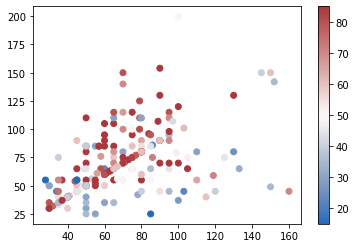

In [30]:
# all quantitative
plt.scatter(data=df_subset, x='defense', y='special-defense', c='speed', cmap='vlag',
            vmin=15, vmax=85);
plt.colorbar();

---

**Task 2**: How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. **Hint**: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its `.set()` method will be vital for adjusting the axis scaling and tick marks. Check the [last example in the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for an example of how the `.set()` method is used, and the [matplotlib documentation of the Axes class](https://matplotlib.org/api/axes_api.html) for properties that you might want to set.

To complete the second task, we need to first reshape the dataset so that all Pokémon types are recorded in a single column. This will add duplicates of Pokémon with two types, which is fine for the task to be performed.

In [33]:
type_cols = ['type_1','type_2']
non_type_cols = df.columns.difference(type_cols) # this is good to use!
pkmn_types = df.melt(id_vars = non_type_cols, value_vars = type_cols, 
                     var_name = 'type_level', value_name = 'type').dropna()

In [35]:
pkmn_types.shape

(1212, 14)

In [37]:
pkmn_types['type_level'].value_counts()

type_1    807
type_2    405
Name: type_level, dtype: int64

In [36]:
pkmn_types['type'].value_counts()

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [49]:
#type_fairy = ( pkmn_types['type'] == 'fairy' )
#type_dragon = ( pkmn_types['type'] == 'dragon')
#subset = pkmn_types[(type_fairy) | (type_dragon)] 
subset = pkmn_types.query("type in ['fairy','dragon']")

In [63]:
subset['weight'].describe()

count     92.000000
mean      86.643478
std      154.770876
min        0.100000
25%        6.600000
50%       22.350000
75%       87.500000
max      888.000000
Name: weight, dtype: float64

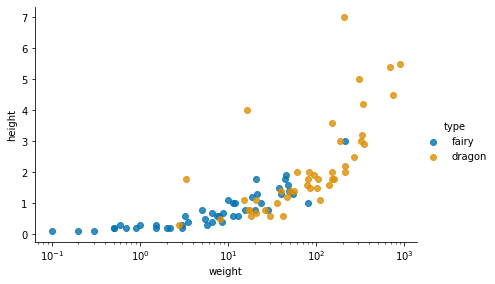

In [96]:
g = sns.FacetGrid(data=subset, height=4, aspect=1.5, hue='type', palette='colorblind')
g.map(sns.regplot, 'weight', 'height', fit_reg=False).set(xscale='log');
g.add_legend();

---

## `1` Faceting in two directions

In the previous lesson, you saw how FacetGrid could be used to subset your dataset across levels of a categorical variable, and then create one plot for each subset. Where the faceted plots demonstrated were univariate before, you can actually use any plot type, allowing you to facet bivariate plots to create a multivariate visualization.

FacetGrid also allows for faceting a variable not just by columns, but **also by rows**. We can set one categorical variable on each of the two facet axes for one additional method of depicting multivariate trends.

Setting **margin_titles = True** means that instead of each facet being labeled with the combination of row and column variable, labels are placed separately on the top and right margins of the facet grid. This is a boon, since the default plot titles are usually too long.

In [97]:
fuel_econ = pd.read_csv('data/fuel-econ.csv')

In [98]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
pd.api.types.CategoricalDtype(categories = sedan_classes, ordered = True)
fuel_econ['trans_type'] = fuel_econ.trans.apply(lambda x: x.split()[0]) 

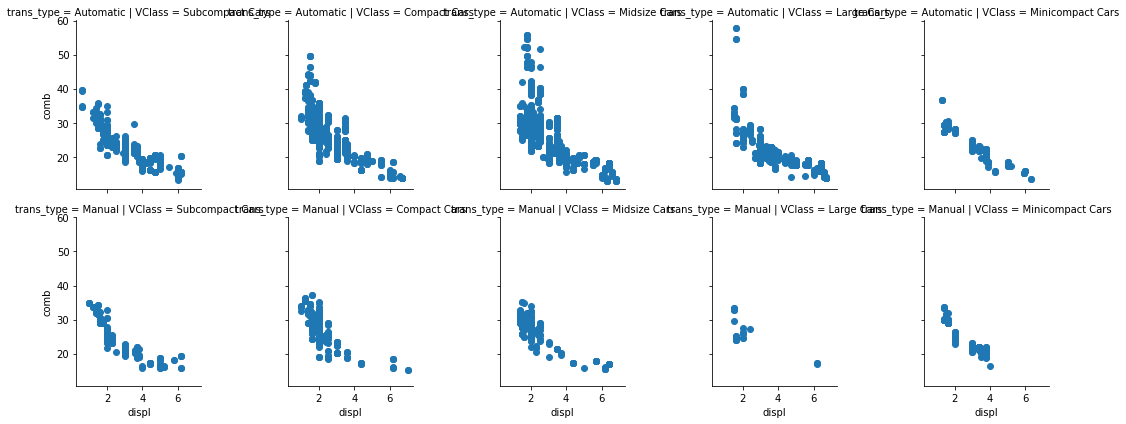

In [102]:
g = sns.FacetGrid(data = fuel_econ, col = 'VClass', row = 'trans_type')
g.map(plt.scatter, 'displ', 'comb');

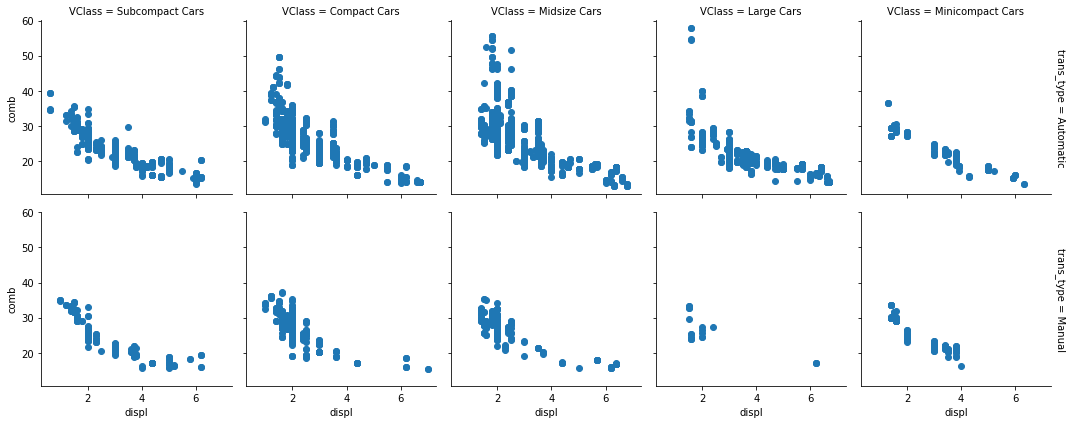

In [103]:
g = sns.FacetGrid(data = fuel_econ, col = 'VClass', row = 'trans_type', margin_titles=True)
g.map(plt.scatter, 'displ', 'comb');

---

## `2` Other Adaptations of Bivariate Plots

You also saw one other way of expanding univariate plots into bivariate plots in the previous lesson: substituting count on a bar chart or histogram for the mean, median, or some other statistic of a second variable. This adaptation can also be done for bivariate plots like the heat map, clustered bar chart, and line plot, to allow them to depict multivariate relationships.

If we want to depict the mean of a **third variable** in a **`2-d histogram`**, we need to **change the weights** of points in the hist2d function similar to how we changed the weights in the 1-d histogram.

---

## `3` Plot matrices

To move back to bivariate exploration for a bit, you might come out of your initial univariate investigation of the data wanting to look at the relationship between many pairs of variables. 

**Rather than generate these bivariate plots one by one**, a preliminary option you might consider for exploration is the creation of a plot matrix. In a plot matrix, a matrix of plots is generated. Each row and column represents a different variable, and a subplot against those variables is generated in each plot matrix cell. This contrasts with faceting, where rows and columns will subset the data, and the same variables are depicted in each subplot.

**Seaborn's `PairGrid`** class facilitates the creation of this kind of plot matrix.

By **default**, PairGrid only **expects to depict numeric variables**; a typical invocation of PairGrid plots the same variables on the horizontal and vertical axes. 

- On the diagonals, where the row and column variables match, a histogram is plotted. 
- Off the diagonals, a scatterplot between the two variables is created.

The pairplot function can also be used to render this common use case in a single call.

For other relationships, the flexibility of PairGrid shines. For example, if we want to look at the relationship between the numeric and categorical variables in the data, we need to set the different variable types on the rows and columns, then use an appropriate plot type for all matrix cells.

When you choose to create a plot matrix, be aware that the time it takes to render the plot depends on the number of data points you have and the number of variables you want to plot. Increasing the number of variables increases the number of plots that need to be rendered in a quadratic fashion. 

In addition, increasing the number of variables means that the individual subplot size needs to be reduced in order to fit the matrix width on your screen. That means that, if you have a lot of data, it might be difficult to see the relationships between variables due to overplotting, and it will take a long time to complete. 

One recommended approach is to take a random subset of the data to plot in the plot matrix instead. Use the plot matrix to identify interesting variable pairs, and then follow it up with individual plots on the full data.



In [104]:
df = pd.read_csv('data/pokemon.csv')

In [106]:
pokm_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']

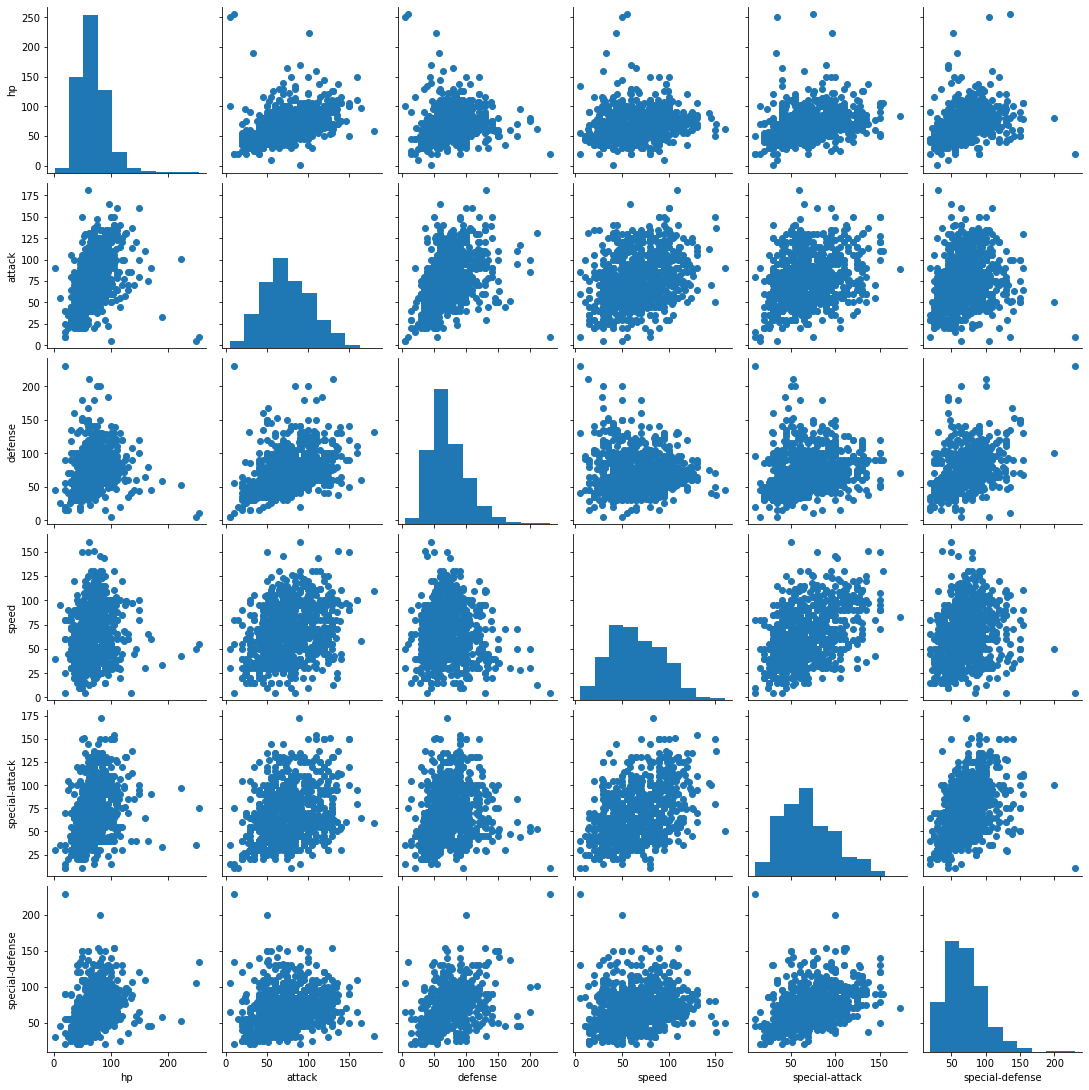

In [110]:
g = sns.PairGrid(data = df, vars = pokm_stats);
#g.map(plt.scatter);
g = g.map_offdiag(plt.scatter);
g.map_diag(plt.hist); # to make the univrate plots (in diagonal) as histgram

### Correlation Matrices
For **numeric variables**, it can be useful to create a **correlation matrix** as part of your exploration. While it's true that the .corr function is perfectly fine for computing and returning a matrix of correlation coefficients, it's not too much trouble to plot the matrix as a **`heat map`** to make it easier to see the strength of the relationships.

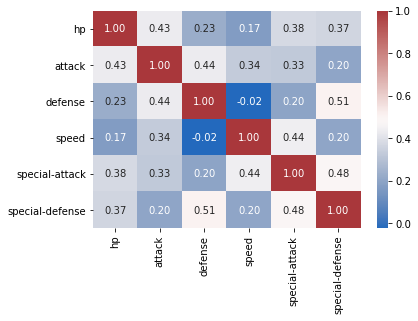

In [123]:
corr_map = df[pokm_stats].corr()
sns.heatmap(corr_map, annot=True, fmt='.2f', cmap='vlag');

---

## `4` Feature engineering

In [127]:
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [129]:
df['att_ratio'] = df['attack'] / df['special-attack']
df['def_ratio'] = df['defense'] / df['special-defense']

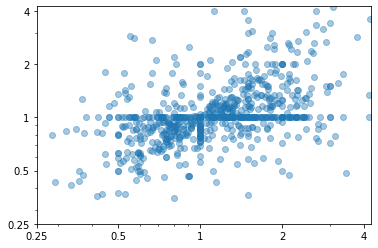

In [150]:
plt.scatter(data = df, x = 'att_ratio', y = 'def_ratio', alpha = 0.4);
plt.xscale('log')
plt.yscale('log')
log_ticks = [0.25, 0.5, 1, 2, 4]
plt.xticks(log_ticks, log_ticks)
plt.yticks(log_ticks, log_ticks);
plt.xlim(0.25, 4.25);
plt.ylim(0.25, 4.25);

This is not so much an additional technique for adding variables to your plot, but a reminder that feature engineering is a tool that you can leverage as you explore and learn about your data. As you explore a dataset, you might find that two variables are related in some way. 

#### Feature engineering is all about creating a new variable with a sum, difference, product, or ratio between those original variables that may lend a better insight into the research questions you seek to answer.

For example, if you have one variable that gives a count of crime incidents, and a second one that gives population totals, then you may want to engineer a new variable by dividing the former by the latter, obtaining an incident rate. This would account for a possible relationship between the original features where if there are more people, there might naturally be more chances for crimes to occur. If we looked at the raw counts rather than the incident rate, we risk just seeing information about population sizes rather than what we might really want.

Another way that you can perform feature engineering is to use the cut function to divide a numeric variable into ordered bins. When we split a numeric variable into ordinal bins, it opens it up to more visual encodings. For example, we might facet plots by bins of a numeric variable, or use discrete color bins rather than a continuous color scale. This kind of discretization step might help in storytelling by clearing up noise, allowing the reader to concentrate on major trends in the data. Of course, the bins might also mislead if they're spaced improperly – check out [this PolicyViz post](https://policyviz.com/2017/11/02/choosing-map-bins/) if you'd like to see a deeper discussion in the context of map-based visualizations.

### How Much is Too Much?

By now, you've seen a lot of ways of expanding the number of variables that can be depicted in a single visualization. The basic positional axes can handle two variables: one on the horizontal and one on the vertical. You can facet by both columns and rows to add up to two variables. Encodings in shape, size, and color could add as many as three more. However, you should try and resist the temptation to overuse your newfound power, and to instead practice some restraint in the number of variables that you include in any one plot.

When you have only two variables plotted, A and B, you have only one relationship to understand. Add in a third variable C, and you have three pairwise relationships: A vs. B, A vs. C, and B vs. C. You also need to consider one interaction effect between all three variables: Does the value of C affect the relationship between A and B? With a fourth variable, you have six possible pairwise relationships and four different three-variable interaction effects. This exponential explosion of possible relationships with the number of variables means that there is a potential for cognitive overload if the data isn't conveyed clearly.

This is why it is so important to approach data exploration systematically, rather than just throw as many variables together as possible immediately. When you move from univariate visualizations to bivariate visualizations, you augment your previous understanding of individual distributions by seeing how they relate to one another. If you look at pairwise visualizations before putting together a trivariate plot, then you will have a clear view to how the interaction, if present, changes your previous understanding of the marginal pairwise relationship.

When you move on to explanatory data visualizations, try to limit the number of variables that are introduced at the same time and make sure that the encoding choices convey the main findings to your reader in the clearest way possible. While it's good to keep a soft limit of about three or four variables in a single visualization, you can exceed this if the trends are clear or you introduce features to your reader in a systematic way.